<a href="https://colab.research.google.com/github/winterForestStump/thesis/blob/main/evaluation/N%2BF%2BR(6)/eval_analyzis_ragNFR(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
nike = pd.read_json('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/N%2BF%2BR(6)/evaluation_results/evaluation_results_Nike.json')
m3 = pd.read_json('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/N%2BF%2BR(6)/evaluation_results/evaluation_results_3M.json')
adobe = pd.read_json('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/N%2BF%2BR(6)/evaluation_results/evaluation_results_ADOBE.json')
cola = pd.read_json('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/N%2BF%2BR(6)/evaluation_results/evaluation_results_CocaCola.json')
gen_mills = pd.read_json('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/N%2BF%2BR(6)/evaluation_results/evaluation_results_GEN_MILLS.json')
questions = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/thesis/main/questions/questions_ver2.txt', sep='\t', header=None)

In [2]:
list_1 = [nike, m3, adobe, cola, gen_mills]
list_2 = ['Nike', '3M', 'Adobe', 'CocaCola', 'General Mills']

results_list = []
for i in range(len(list_1)):
  melted = pd.melt(list_1[i], id_vars=['index'], value_vars=['The context is relevant to the company', 'The context is relevant to the question',
                                'The response is correct', 'The response answers the question'], var_name='metric_name', value_name='metric_value')
  melted['company_name'] = list_2[i]
  results_list.append(melted)

results = pd.concat(results_list, ignore_index=True)

In [3]:
results.shape

(700, 4)

In [4]:
for i in range(len(list_1)):
  print(f'The average metrics for {list_2[i]}:\n\n{list_1[i].mean()}')

The average metrics for Nike:

index                                      17.000000
The context is relevant to the company      1.000000
The context is relevant to the question     0.457143
The response is correct                     0.400000
The response answers the question           0.742857
dtype: float64
The average metrics for 3M:

index                                      17.000000
The context is relevant to the company      1.000000
The context is relevant to the question     0.371429
The response is correct                     0.714286
The response answers the question           0.485714
dtype: float64
The average metrics for Adobe:

index                                      17.000000
The context is relevant to the company      1.000000
The context is relevant to the question     0.485714
The response is correct                     0.742857
The response answers the question           0.571429
dtype: float64
The average metrics for CocaCola:

index                            

In [12]:
results['metric_name'].unique()

array(['The context is relevant to the company',
       'The context is relevant to the question',
       'The response is correct', 'The response answers the question'],
      dtype=object)

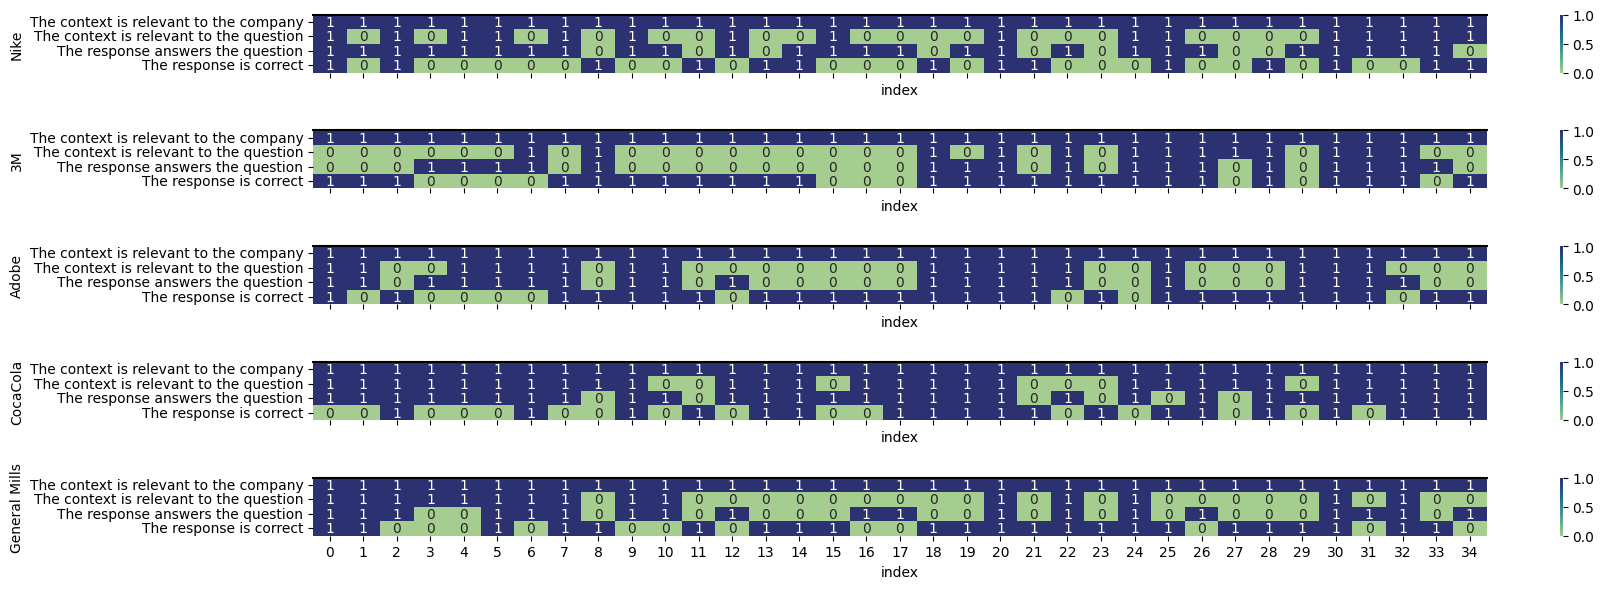

In [22]:
from copy import error
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(company_name, data, ax):
    glue_ax = results[results['company_name'] == company_name].pivot(index="metric_name", columns="index", values="metric_value")
    sns.heatmap(glue_ax, annot=True, cmap="crest", ax=ax)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_ylabel(company_name)
    ax.set_yticklabels(glue_ax.index)

company_names = ['Nike', '3M', 'Adobe', 'CocaCola', 'General Mills']
num_plots = len(company_names)

f, axes = plt.subplots(num_plots, 1, figsize=(18, 6), sharex=True)

for i, company_name in enumerate(company_names):
    plot_heatmap(company_name, results, axes[i])

plt.tight_layout(h_pad=2)
plt.show()
